In [91]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

In [92]:
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

In [93]:
df = pd.read_csv("C:/Users/17172/Desktop/iRCT/datasets/LSM-15Year.txt", sep="\t")
df.index = range(1, len(df)+1, 1)
df

,race ethnicity,smoking,alcohol_useage,family_history,age_at_diagnosis,menopause_status,side,TNEG,ER,ER_percent,...,size,grade,invasive,histology2,invasive_tumor_Location,DCIS_level,re_excision,surgical_margins,MRIs_60_surgery,distant_recurrence
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,0,0,2,1,0,1,1,0,0,0,...,1,2,0,0,0,2,1,0,0,1
4,0,1,1,0,2,0,1,0,0,0,...,0,1,0,1,2,3,0,0,0,1
5,0,0,2,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0,1,0,2,1,0,1,1,1,1,...,0,2,0,0,0,0,1,0,0,1
748,0,1,2,4,1,0,1,0,0,2,...,0,2,0,0,0,3,1,0,1,0
749,0,1,0,3,0,1,0,0,0,0,...,0,1,1,2,0,5,0,0,0,0
750,0,1,2,0,0,0,1,0,0,1,...,1,2,1,2,0,2,0,0,0,0


In [94]:
from sklearn.linear_model import LogisticRegression as lr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [95]:
y = df[['distant_recurrence']]
dfWithoutOutcome = df.drop(columns=['distant_recurrence'])
dfWithoutOutcome

,race ethnicity,smoking,alcohol_useage,family_history,age_at_diagnosis,menopause_status,side,TNEG,ER,ER_percent,...,Histology,size,grade,invasive,histology2,invasive_tumor_Location,DCIS_level,re_excision,surgical_margins,MRIs_60_surgery
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,2,1,0,1,1,0,0,0,...,0,1,2,0,0,0,2,1,0,0
4,0,1,1,0,2,0,1,0,0,0,...,2,0,1,0,1,2,3,0,0,0
5,0,0,2,2,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0,1,0,2,1,0,1,1,1,1,...,0,0,2,0,0,0,0,1,0,0
748,0,1,2,4,1,0,1,0,0,2,...,0,0,2,0,0,0,3,1,0,1
749,0,1,0,3,0,1,0,0,0,0,...,0,0,1,1,2,0,5,0,0,0
750,0,1,2,0,0,0,1,0,0,1,...,1,1,2,1,2,0,2,0,0,0


In [96]:
T = dfWithoutOutcome['menopause_status']
T

1      0
2      0
3      1
4      0
5      0
      ..
747    0
748    0
749    1
750    0
751    0
Name: menopause_status, Length: 751, dtype: int64

In [97]:
X = dfWithoutOutcome.loc[:, dfWithoutOutcome.columns != 'menopause_status']
X

,race ethnicity,smoking,alcohol_useage,family_history,age_at_diagnosis,side,TNEG,ER,ER_percent,PR,...,Histology,size,grade,invasive,histology2,invasive_tumor_Location,DCIS_level,re_excision,surgical_margins,MRIs_60_surgery
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,2,1,0,1,0,0,0,0,...,0,1,2,0,0,0,2,1,0,0
4,0,1,1,0,2,1,0,0,0,0,...,2,0,1,0,1,2,3,0,0,0
5,0,0,2,2,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0,1,0,2,1,1,1,1,1,1,...,0,0,2,0,0,0,0,1,0,0
748,0,1,2,4,1,1,0,0,2,1,...,0,0,2,0,0,0,3,1,0,1
749,0,1,0,3,0,0,0,0,0,0,...,0,0,1,1,2,0,5,0,0,0
750,0,1,2,0,0,1,0,0,1,1,...,1,1,2,1,2,0,2,0,0,0


In [98]:
pipe = Pipeline([('scaler', StandardScaler()), ('logistic_classifier', lr())])
pipe.fit(X, T)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

In [99]:
predictions = pipe.predict_proba(X)
predictions_binary = pipe.predict(X)

In [100]:
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))

Accuracy: 0.9201



In [101]:
predictions_logit = np.array([logit(xi) for xi in predictions[:,1]])

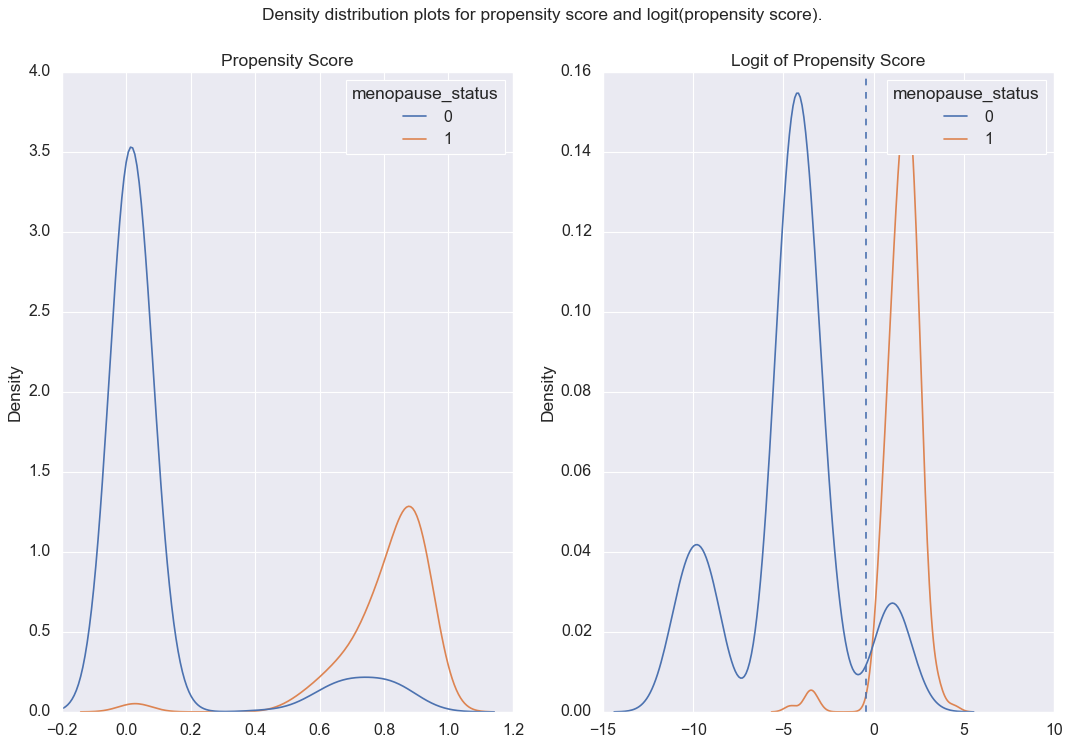

In [102]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
ax[0].set_title('Propensity Score')
sns.kdeplot(x = predictions_logit, hue = T , ax = ax[1])
ax[1].axvline(-0.4, ls='--')
ax[1].set_title('Logit of Propensity Score')
plt.show()

In [103]:
common_support = (predictions_logit > -10) & (predictions_logit < 10)

In [104]:
dfWithoutOutcome.loc[:, 'propensity_score'] = predictions[:,1]
dfWithoutOutcome.loc[:, 'propensity_score_logit'] = predictions_logit
dfWithoutOutcome.loc[:, 'outcome'] = y.distant_recurrence
dfWithoutOutcome['propensity_score']

,race ethnicity,smoking,alcohol_useage,family_history,age_at_diagnosis,menopause_status,side,TNEG,ER,ER_percent,...,invasive,histology2,invasive_tumor_Location,DCIS_level,re_excision,surgical_margins,MRIs_60_surgery,propensity_score,propensity_score_logit,outcome
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.747612,1.085915,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0.014279,-4.234591,1
3,0,0,2,1,0,1,1,0,0,0,...,0,0,0,2,1,0,0,0.546772,0.187635,1
4,0,1,1,0,2,0,1,0,0,0,...,0,1,2,3,0,0,0,0.000164,-8.715689,1
5,0,0,2,2,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0.009318,-4.666469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0,1,0,2,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0.015273,-4.166270,1
748,0,1,2,4,1,0,1,0,0,2,...,0,0,0,3,1,0,1,0.019854,-3.899306,0
749,0,1,0,3,0,1,0,0,0,0,...,1,2,0,5,0,0,0,0.584669,0.341970,0
750,0,1,2,0,0,0,1,0,0,1,...,1,2,0,2,0,0,0,0.946189,2.866967,0
